Accuracy: 0.7
Confusion Matrix:
[[134  20]
 [ 40   6]]


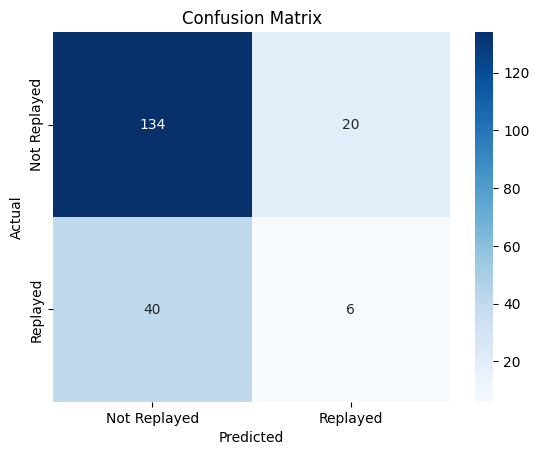

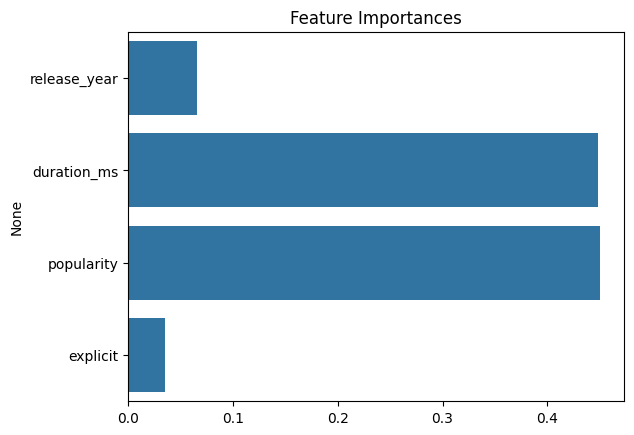


Top 5 Recommended Songs:
    song_name  predicted_replay_prob
979    Song E                   0.94
216    Song H                   0.91
971    Song A                   0.90
968    Song J                   0.89
963    Song G                   0.89


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Create a list of fake song names and years
songs = ['Song A', 'Song B', 'Song C', 'Song D', 'Song E', 'Song F', 'Song G', 'Song H', 'Song I', 'Song J']
years = [2020, 2021, 2022, 2023]

# Generate a fake dataset
n_samples = 1000  # Number of user-song interactions

# Randomly generate data for the songs
data = {
    'song_name': np.random.choice(songs, size=n_samples),
    'release_year': np.random.choice(years, size=n_samples),
    'duration_ms': np.random.randint(180000, 300000, size=n_samples),  # Random song duration (3 to 5 minutes)
    'popularity': np.random.uniform(0, 100, size=n_samples),  # Random popularity score between 0 and 100
    'explicit': np.random.choice([0, 1], size=n_samples),  # Explicit content indicator (0 or 1)
    'replayed': np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # 30% chance that a song is replayed
}

# Create the DataFrame
df = pd.DataFrame(data)

# Prepare the feature set (X) and target variable (y)
X = df.drop(columns=['song_name', 'replayed'])  # Drop non-numeric columns like 'song_name'
y = df['replayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Replayed', 'Replayed'], yticklabels=['Not Replayed', 'Replayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()

# Recommendation Function
def recommend_songs(df, model, top_n=5):
    # Predict the probability of replay for all songs
    df['predicted_replay_prob'] = model.predict_proba(df.drop(columns=['song_name', 'replayed']))[:, 1]

    # Sort songs by predicted probability of being replayed
    recommended_songs = df.sort_values(by='predicted_replay_prob', ascending=False).head(top_n)

    # Return the top N recommended songs
    return recommended_songs[['song_name', 'predicted_replay_prob']]

# Get top 5 recommended songs
recommended_songs = recommend_songs(df, model, top_n=5)

# Display the recommended songs
print("\nTop 5 Recommended Songs:")
print(recommended_songs)
